# Support Vector Machine

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,  precision_score, recall_score, 
f1_score, auc, log_loss, roc_auc_score, roc_curve, precision_recall_curve, plot_precision_recall_curve)

# Load the Dataset

In [5]:
df = datasets.load_breast_cancer()

In [6]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
df.target_names  # So binary classification problem

array(['malignant', 'benign'], dtype='<U9')

In [9]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
df.feature_names.shape

(30,)

In [11]:
X = df.data
y = df.target

X.shape, y.shape

((569, 30), (569,))

In [12]:
X

# it looks like scaling is required. 

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

# Standardization

In [13]:
# The idea behind StandardScaler() is that it will transform your data such that its distribution will have a 
# mean value 0 and standard deviation of 1.

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Split the data and build the model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1, stratify = y)

# Linear kernel

In [16]:
from sklearn import svm

In [17]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

In [18]:
def classification_metrics_udf(y_test, y_predict):
    
    print("Confusion Matrix :\n\n", confusion_matrix(y_test,y_predict))

    mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
               xticklabels=df.target_names,
               yticklabels=df.target_names)

    plt.xlabel('\n Predicted Label')
    plt.ylabel('True Label \n')
    plt.show()
    
    print("\n\n Classification Report: \n\n", classification_report(y_test, y_predict))
    
    print("\n\n Accuracy Score: \n\n", accuracy_score(y_test, y_predict)) 

    print("\n\n Missclassfication Rate: \n\n", 1 - accuracy_score(y_test, y_predict))

    # we can enable the below ones if it's binary classification problem. 
    # For multile class classification below needs some tweaking. Pls refer to word doc. 
    
    print("\n\n Recall Score: \n\n", recall_score(y_test, y_predict))

    print("\n\n Precision Score: \n\n", precision_score(y_test, y_predict))

    print("\n\n f1 Score: \n\n", f1_score(y_test, y_predict)) 

    print("\n\n roc_auc_score:\n\n", roc_auc_score(y_test, y_predict))

Confusion Matrix :

 [[41  1]
 [ 0 72]]


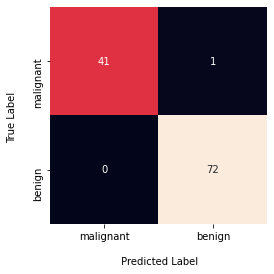



 Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



 Accuracy Score: 

 0.9912280701754386


 Missclassfication Rate: 

 0.00877192982456143


 Recall Score: 

 1.0


 Precision Score: 

 0.9863013698630136


 f1 Score: 

 0.993103448275862


 roc_auc_score:

 0.988095238095238


In [19]:
classification_metrics_udf(y_test, y_predict)

In [20]:
element, count = np.unique(y_test, return_counts=True)
element, count

# to see the actual result in y-test, so there were 42 melignant and 72 benign cases.

(array([0, 1]), array([42, 72]))

# Polynomial Kernel

Confusion Matrix :

 [[38  4]
 [ 2 70]]


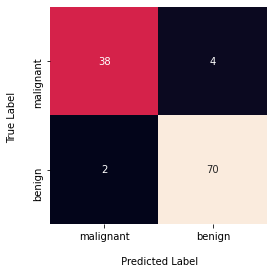



 Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



 Accuracy Score: 

 0.9473684210526315


 Missclassfication Rate: 

 0.052631578947368474


 Recall Score: 

 0.9722222222222222


 Precision Score: 

 0.9459459459459459


 f1 Score: 

 0.9589041095890412


 roc_auc_score:

 0.9384920634920635


In [21]:
clf = svm.SVC(kernel='poly', degree = 5, gamma = 100)
# Later need to understand how to choose best value for degree and gamma. 

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

classification_metrics_udf(y_test, y_predict)

# Sigmoid Kernel

Confusion Matrix :

 [[38  4]
 [ 8 64]]


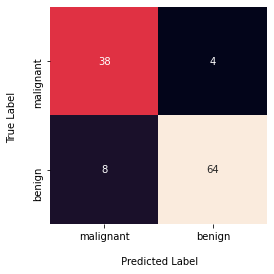



 Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.90      0.86        42
           1       0.94      0.89      0.91        72

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



 Accuracy Score: 

 0.8947368421052632


 Missclassfication Rate: 

 0.10526315789473684


 Recall Score: 

 0.8888888888888888


 Precision Score: 

 0.9411764705882353


 f1 Score: 

 0.9142857142857143


 roc_auc_score:

 0.8968253968253969


In [22]:
clf = svm.SVC(kernel='sigmoid', gamma = 200, C = 10000)
# Later need to understand how to choose best value for gamma and C (penalty parameter). 

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

classification_metrics_udf(y_test, y_predict)

# RBF Kernel

Confusion Matrix :

 [[40  2]
 [ 0 72]]


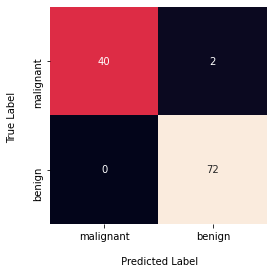



 Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



 Accuracy Score: 

 0.9824561403508771


 Missclassfication Rate: 

 0.01754385964912286


 Recall Score: 

 1.0


 Precision Score: 

 0.972972972972973


 f1 Score: 

 0.9863013698630138


 roc_auc_score:

 0.9761904761904762


In [26]:
clf = svm.SVC(kernel='rbf')  #default kernel is also RBF kernel

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

classification_metrics_udf(y_test, y_predict)

In [ ]:
# So we can see that for our problem statement, Linear Kernel gave optimized result. 